# Capital Cities Clustering

## Content:

1. Introduction
2. Loading data and final adjustments
3. K-Means clustering
4. Visualizing results  
5. Results
6. Summary  
7. Refrences

### 1. Introduction:  
* In this notebook we will use the top venues data we gathered for each capital city using the Foursquare API for a K-Means analysis. 
* We will strat with some finishing touches and pre-processing of our data.  
* We will visualize the K-Means results on a map giving each cluster of countreis a color.  
* In the last section we will interpret our K-Means results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import json
import urllib.request
import seaborn as sns
sns.set()

import matplotlib.colors as colors

from sklearn.cluster import KMeans
from branca.colormap import LinearColormap


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 2. Loading data and final adjustments:

#### 2.1. Loading data from previous notebooks.

In [2]:
# Load "Capital_Venues_Normalized.csv":
capital_venues = pd.read_csv('Capital_Venues_Normalized.csv')

capital_venues.head()

,Capital City,ATM,Accessories Store,Advertising Agency,Airport,Airport Food Court,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Bathing Area,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Capitol Building,Caribbean Restaurant,Casino,Castle,Caucasian Restaurant,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Gym,College Library,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cricket Ground,Cruise,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dive Shop,Dive Spot,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Irish Pub,Island,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kafenio,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Lighthouse,Liquor Store,Lounge,Magirio,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Meyhane,Meze Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Monastery,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Northeastern Brazilian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Event,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outlet Store,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastelaria,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish Re

In [3]:
# Load "Capital_Regions.csv":
capital_regions = pd.read_csv('Capital_Regions.csv')

capital_regions.head()

,Country,Capital City,City Latitude,City Longitude,Region,Income Group
0,Albania,Tirana,41.315886,19.900912,Europe & Central Asia,2
1,Andorra,Andorra la Vella,42.506939,1.521247,Europe & Central Asia,3
2,Antigua and Barbuda,St. John's,17.118457,-61.844851,Latin America & Caribbean,3
3,Argentina,Buenos Aires,-34.607568,-58.437089,Latin America & Caribbean,2
4,Aruba,Oranjestad,12.526874,-70.035685,Latin America & Caribbean,3


In [4]:
# Load "GDP_Capita.csv":
GDP_capita = pd.read_csv('GDP_Capita.csv')

# Keep only relevant columns:
GDP_capita = GDP_capita[['Country', '2018']]

GDP_capita.head()

,Country,2018
0,Afghanistan,521
1,Albania,5269
2,Algeria,4115
3,American Samoa,11467
4,Andorra,42030


In [5]:
# Report message - shapes of loaded dataframes:
print(\
'"capital_venues" shape: {}\n\
"capital_regions" shape: {}\n\
"GDP_capita" shape: {}'\
      .format(
        capital_venues.shape,
        capital_regions.shape,
        GDP_capita.shape
             )
     )

"capital_venues" shape: (82, 402)
"capital_regions" shape: (82, 6)
"GDP_capita" shape: (237, 2)


#### 2.2. Pre-processing data:

#### 2.2.1. Combining  relevant data:

In [6]:
# Create "economic_data" dataframe:
economic_data = capital_regions.copy()

# Add "GDP/Capita" of 2018 to dataframe:
economic_data = economic_data.merge(GDP_capita, left_on = 'Country', right_on = 'Country')

economic_data.rename(columns = {'2018':'GDP/Capita 2018'}, inplace = True)

# Remove irrelevant columns:
economic_data.drop(columns = ['Region', 'Income Group'], axis = 1, inplace = True)

economic_data.head()

,Country,Capital City,City Latitude,City Longitude,GDP/Capita 2018
0,Albania,Tirana,41.315886,19.900912,5269
1,Andorra,Andorra la Vella,42.506939,1.521247,42030
2,Antigua and Barbuda,St. John's,17.118457,-61.844851,16727
3,Argentina,Buenos Aires,-34.607568,-58.437089,11684
4,Austria,Vienna,48.208354,16.372504,51462


In [7]:
economic_data.shape

(71, 5)

#### 2.2.2 Verifying GDP/Capita distribution:

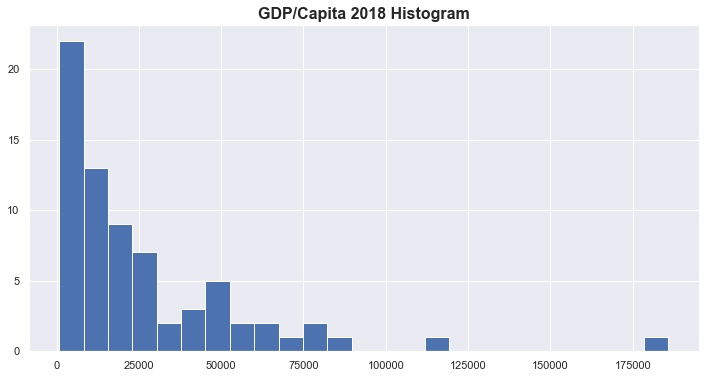

In [8]:
# Check the distribution of "GDP/Capita 2018":
plt.figure(figsize = (12,6))
GDP_capita = economic_data['GDP/Capita 2018']
GDP_capita.hist(bins = 25)
plt.title('GDP/Capita 2018 Histogram', fontsize = 16, fontweight = 'bold')


plt.show()

This looks like a logarithmic distribution, we will do a log transformation to the GDP/Capita data.

In [9]:
# Log transformation of "GDP/Capita 2018":
economic_data['Log(GDP/Capita 2018)'] = np.log(economic_data['GDP/Capita 2018'])

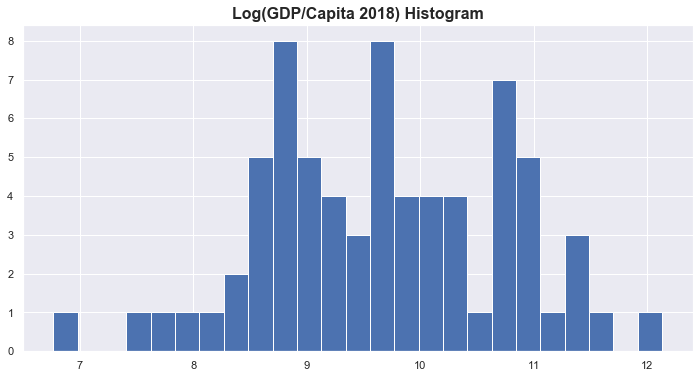

In [10]:
plt.figure(figsize = (12,6))
log_GDP_capita = economic_data['Log(GDP/Capita 2018)']
log_GDP_capita.hist(bins = 25)
plt.title('Log(GDP/Capita 2018) Histogram', fontsize = 16, fontweight = 'bold')

plt.show()

This looks much more like a normal distribution, looks like GDP/Capita has a log-normal distribution.

In [11]:
# Create "analysis_data" dataframe:
analysis_data = economic_data.copy()

# Remove the "GDP/Capita 2018" column:
analysis_data.drop(['GDP/Capita 2018'], axis = 1, inplace = True)

analysis_data.head(3)

,Country,Capital City,City Latitude,City Longitude,Log(GDP/Capita 2018)
0,Albania,Tirana,41.315886,19.900912,8.569596
1,Andorra,Andorra la Vella,42.506939,1.521247,10.646139
2,Antigua and Barbuda,St. John's,17.118457,-61.844851,9.724779


In [12]:
analysis_data.shape

(71, 5)

#### 2.2.3. Normalizing log(GDP/Capita 2018) data:

In the previous notebook ,where we used the Foursquare API to get the top venues for each captal city, we normalized the top venues data.  
We will normalize the *__log(GDP/Capita 2018)__* to keep it in scale with the rest of our data.  
We will normalize the *__Log(GDP/Capita 2018)*__ data using this function:

$$Value_{old} - Value_{min} \over Value_{max} - Value_{min}$$

In [13]:
# Create "analysis_data_normal" dataframe:
analysis_data_normal = analysis_data.copy()

# Normalize the "Log(GDP/Capita 2018)" data:
old_value = analysis_data_normal['Log(GDP/Capita 2018)']
min_value = analysis_data_normal['Log(GDP/Capita 2018)'].min()
max_value = analysis_data_normal['Log(GDP/Capita 2018)'].max()
    
analysis_data_normal['Log(GDP/Capita 2018)'] = (old_value - min_value)/(max_value - min_value)

analysis_data_normal.head()

,Country,Capital City,City Latitude,City Longitude,Log(GDP/Capita 2018)
0,Albania,Tirana,41.315886,19.900912,0.336085
1,Andorra,Andorra la Vella,42.506939,1.521247,0.723073
2,Antigua and Barbuda,St. John's,17.118457,-61.844851,0.551367
3,Argentina,Buenos Aires,-34.607568,-58.437089,0.484499
4,Austria,Vienna,48.208354,16.372504,0.760803


#### 2.2.4. Prepare the K-Means dataframe for analysis:

In [14]:
# Create "kmeans_data" dataframe:
kmeans_data = analysis_data_normal.copy()

# Join between GDP/Capita data and capital venues data:
kmeans_data = kmeans_data.merge(capital_venues, left_on = 'Capital City', right_on = 'Capital City')

# Remove columns irrelevant for K-Means analysis:
kmeans_data.drop(columns = ['Country', 'Capital City', 'City Latitude', 'City Longitude'], axis = 1, inplace = True)

In [15]:
kmeans_data.shape

(71, 402)

### 3. K-Means clustering:

#### 3.1. Finding the optimal K value using the elbow method:  
We start by fitting our model using different values of K between 1 and 10.

In [16]:
# Calculate K values and their distortion for the elbow method

# A list of WCSS values of each K:
wcss = []

# K values range between 1 and 10:
K = range(1,11)

# Fit K-Means model for each K:
for k in K:
    
    # Fit model for k:
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans = kmeans.fit(kmeans_data)
    
    # Update "wcss" list:
    wcss.append(kmeans.inertia_)
    
# Set elbow method data for grapgh:
elbow = pd.DataFrame({'Distortion' : wcss, 'K' : K}).set_index('Distortion')

#### 3.2. Plot the results of the different values of K.

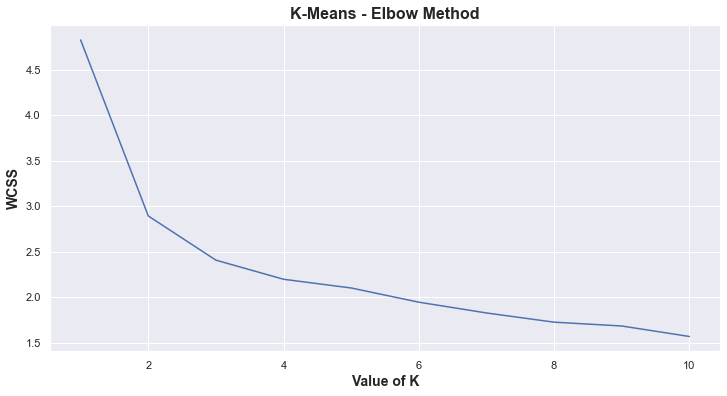

In [17]:
# Plot "elbow" graph:
plt.figure(figsize = (12,6))
plt.plot(elbow['K'], elbow.index)

plt.title('K-Means - Elbow Method', fontsize = 16, fontweight = 'bold')
plt.xlabel('Value of K', fontsize = 14, fontweight = 'bold')
plt.ylabel('WCSS', fontsize = 14, fontweight = 'bold')

plt.show()

#### Fitting our K-Means model using optimal K value:

Our optimal K value is 3, we will fit our K-Means model use this value for our clustering analysis.

In [18]:
# Fit k-means model for k = 3:
kclusters = 3
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(kmeans_data)

In [19]:
# Create "map_display" dataframe:
map_display = analysis_data.copy()

# Add cluster labels to "map_display" dataframe:
map_display.insert(0, 'Cluster Label', kmeans.labels_)

# Fix label value to match cluster number:
map_display['Cluster Label'] = map_display['Cluster Label'] + 1

In [20]:
map_display.head()

,Cluster Label,Country,Capital City,City Latitude,City Longitude,Log(GDP/Capita 2018)
0,3,Albania,Tirana,41.315886,19.900912,8.569596
1,1,Andorra,Andorra la Vella,42.506939,1.521247,10.646139
2,2,Antigua and Barbuda,St. John's,17.118457,-61.844851,9.724779
3,2,Argentina,Buenos Aires,-34.607568,-58.437089,9.365976
4,1,Austria,Vienna,48.208354,16.372504,10.848599


### 4. Visualizing results:

#### 4.1. Prepare for visualizing our data on a map:

We start by loading GeoData.

In [21]:
# Download countries' boundaries data in json format:

# Set URL to access:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json'

# Store data from url:
data = urllib.request.urlopen(url).read().decode()

# Parse json object and store in "world_geon":
world_geo = json.loads(data)

Define a function that will assist with assigning colors for each cluster ploted on our map.

In [22]:
# Color function for map coloring
def get_color(feature, dataframe, index_col, col_to_color):
    x = 0
    """
    Gives a "feature" from a GeoData json a coloring style.
    This is done by taking a "dataframe", "index_col" and a "col_to_color"
    and sets a color for each different value of "col_to_color".
    """
    
    # Crate a dictionary for map color sclae setup:
    map_dict = dataframe.set_index(index_col)[col_to_color].to_dict()

    # Color list for clusters:
    color_list = ['#882371', '#233788', '#23882E']

    # Create a color scale for clusters' values:
    color_scale = LinearColormap(color_list, vmin = min(map_dict.values()), vmax = max(map_dict.values()))
    
    value = map_dict.get(feature['properties']['name'])
    if value is None:
        
        # Missing values will be colored white
        return 'white' 
    
    else:

        # Set color to value:
        return color_scale(value)

#### 4.2. Visualizing results on a map - testing our data:

In [23]:
# Create map object:
cluster_map = folium.Map(location = [0, 0], zoom_start = 2, )

dataframe = map_display
index_col = 'Country'
col_to_color = 'Cluster Label'

folium.GeoJson(
    data = world_geo,
    style_function = lambda feature: {
        'fillColor': get_color(feature, dataframe, index_col, col_to_color),
        'fillOpacity': 0.8,
        'color' : 'black',
        'weight' : 0.5,
    }
).add_to(cluster_map)
  

cluster_map

__Here is a link to an image that show the results of the last cell's code.__

https://raw.githubusercontent.com/Guy-DM/Data-analysis-and-analytics/master/Images/1.5.Capital_Cities_Clustering/Map_image1.JPG

#### 4.3. Applying some fixes to our data:

#### Adding missing countries:  
Some of the countries' from the *__map_display__* dataframe do not match the names in *__world_geon__*.  
The most noticeable example is *__The United States__*.

This is a good example for a case where visualizing data helps find inconsistencies.  
We will manually fix this by changing the names in *__map_display__* to match the names in *__world_geon__*.  

__A few important notes:__  
* Even after fixing some countries' names, there are still countries in our K-Means analysis that do not appear on the map.  
* This is most likely due to missing values of these countries in the GeoData.  
* In some cases, a country was dropped from our dataframe when getting top venues data as none were found for its coordinates.  
* Another example is Bolivia, which was dropped in the capital cities names processing in an earlier notebook due to its capital city's definition (there was no "official" or "lagislative" capital city value for Bolivia). 

In [24]:
# Find "North Macedonia" index number:
map_display[map_display['Country'] == 'North Macedonia']

,Cluster Label,Country,Capital City,City Latitude,City Longitude,Log(GDP/Capita 2018)
49,3,North Macedonia,Skopje,41.996092,21.431649,8.713418


In [25]:
# Change "North Macedonia" name:
map_display.at[49, 'Country'] = 'Macedonia' 

In [26]:
# Change "United States" name:
map_display[map_display['Country'] == 'United States']

,Cluster Label,Country,Capital City,City Latitude,City Longitude,Log(GDP/Capita 2018)
69,1,United States,"Washington, D.C.",38.894893,-77.036553,11.047631


In [27]:
# Change "United States" name:
map_display.at[69, 'Country'] = 'United States of America' 

#### 4.4. Final visualization on a map:

In [28]:
# Create map object:
cluster_map = folium.Map(location = [0, 0], zoom_start = 2, )

dataframe = map_display
index_col = 'Country'
col_to_color = 'Cluster Label'

folium.GeoJson(
    data = world_geo,
    style_function = lambda feature: {
        'fillColor': get_color(feature, dataframe, index_col, col_to_color),
        'fillOpacity': 0.8,
        'color' : 'black',
        'weight' : 0.5,
    }
).add_to(cluster_map)
  

cluster_map

__Here is a link to an image that show the results of the last cell's code.__

https://raw.githubusercontent.com/Guy-DM/Data-analysis-and-analytics/master/Images/1.5.Capital_Cities_Clustering/Map_image2.JPG

### 5. Results:

__Note__: A detailed analysis is available in the full report of this project.  
This report is avilable in the link:  


Although the detailed interpretation of the results of the data analysis done in this note book is provided in the full report, you can still browse through this section and check out the results.

#### 5.1. Preparing the results data for final analysis:  
We will crate 2 dataframes to help us analyze our results:  
1) *__results_venus__* - for *__GDP/Capita__* related analysis.  
2) *__results_analysis__* -  for *__Venues__* related analysis.

#### 5.1.1. *Venues* related data preparation:

In [29]:
# Create "map_display" dataframe:
results_venus = capital_venues.copy()

# Crate a dataframe of cities that were analyzed:
keep_cities = economic_data['Capital City']

# A join that removes cities that were not analyzed:
results_venus = results_venus.merge(keep_cities, left_on = 'Capital City', right_on = 'Capital City')

# Add cluster labels to "map_display" dataframe:
results_venus.insert(0, 'Cluster Label', kmeans.labels_)

# Fix label value to match cluster number:
results_venus['Cluster Label'] = results_venus['Cluster Label'] + 1

# Drop "Capital City" column:
results_venus.drop('Capital City', axis = 1, inplace = True)

results_venus.head()

,Cluster Label,ATM,Accessories Store,Advertising Agency,Airport,Airport Food Court,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Bathing Area,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Capitol Building,Caribbean Restaurant,Casino,Castle,Caucasian Restaurant,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Gym,College Library,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cricket Ground,Cruise,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dive Shop,Dive Spot,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Irish Pub,Island,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kafenio,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Lighthouse,Liquor Store,Lounge,Magirio,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Meyhane,Meze Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Monastery,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Northeastern Brazilian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Event,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outlet Store,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastelaria,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish R

#### 5.1.2. *GDP/Capita* related data preparation:

In [30]:
results_analysis = economic_data.copy()

# Add cluster labels to "map_display" dataframe:
results_analysis.insert(0, 'Cluster Label', kmeans.labels_)

# Fix label value to match cluster number:
results_analysis['Cluster Label'] = results_analysis['Cluster Label'] + 1

# Keep these columns:
results_columns = ['Cluster Label', 'Country', 'Capital City', 'GDP/Capita 2018']
results_analysis = results_analysis[results_columns]


results_analysis.head()

,Cluster Label,Country,Capital City,GDP/Capita 2018
0,3,Albania,Tirana,5269
1,1,Andorra,Andorra la Vella,42030
2,2,Antigua and Barbuda,St. John's,16727
3,2,Argentina,Buenos Aires,11684
4,1,Austria,Vienna,51462


#### 5.2. function definition for analysis:

In [31]:
def get_cluster_countries (dataframe, cluster_num):
    
    '''
    Takes a dataframe and a cluster number, then returns a dataframe of
    countries sorted in descending order of GDP/Cpita value.
    '''
    
    cluster_countries = dataframe[dataframe['Cluster Label'] == cluster_num].sort_values('GDP/Capita 2018', ascending = False)
    cluster_countries.reset_index(drop = True, inplace = True)
    
    cluster_countries.to_csv(r'Cluster{}_Countreis.csv'.format(cluster_num))

    
    return cluster_countries

In [32]:
def get_cluster_GDP_stats (dataframe, cluster_num):
    
    '''
    Takes a dataframe and a cluster number, then returns a summary
    statistics of the GDP/Capita 2018 for that cluster.
    '''
    GDP_stats = dataframe.copy()
    GDP_stats = GDP_stats[GDP_stats['Cluster Label'] == cluster_num]
    GDP_stats.reset_index(drop = True, inplace = True)
    GDP_stats = GDP_stats.describe()
    
    GDP_stats.to_csv(r'Cluster{}_GDP_Stats.csv'.format(cluster_num))

    
    return GDP_stats

In [33]:
def cluster_GDP_barchart (dataframe, cluster_num, color):
    
    '''
    Takes a dataframe, a cluster number and a color, then plots
    a barchart of the GDP/Capita 2018 for each country within
    that cluster.
    '''
    
    sorte_dataframe = dataframe[dataframe['Cluster Label'] == cluster_num].sort_values('GDP/Capita 2018', ascending = False)
    y = sorte_dataframe['GDP/Capita 2018'][dataframe['Cluster Label'] == cluster_num]
    x = sorte_dataframe['Country'][dataframe['Cluster Label'] == cluster_num]
    
    plt.figure(figsize = (12,6))     
    plt.bar(x,y, color = color)
    
    title = 'Cluster '+ str(cluster_num) + ' GDP/Capita 2018'
    plt.title(title, fontsize = 16, fontweight = 'bold')
    plt.xticks(rotation = 90)
    plt.ylabel('GDP/Capita 2018', fontsize = 14)
    

    plt.show()    

In [34]:
def cluster_top_venues (dataframe, cluster_num):
    
    '''
    Takes a dataframe and a cluster number, calculates the mean of
    frequencies the cluster's venues, then returns a dataframe
    of the top 10 most frequent on average.
    '''
    
    top_venues = dataframe.copy()
    top_venues = top_venues[top_venues['Cluster Label'] == cluster_num]
    top_venues.drop('Cluster Label', axis = 1, inplace = True)
    top_venues = pd.DataFrame(top_venues.mean())
    top_venues = top_venues[top_venues[0] != 0].sort_values(0, ascending = False).head(10)
    top_venues.rename(columns = {0:'Average Frequency in Cluster'}, inplace = True)
    
    top_venues.to_csv(r'Cluster{}_Top_Venues.csv'.format(cluster_num))
    
    return top_venues

#### 5.3. Clusters' results:

#### 5.3.1. Cluster 1:

In [35]:
get_cluster_countries(results_analysis, 1)

,Cluster Label,Country,Capital City,GDP/Capita 2018
0,1,Monaco,Monaco,185741
1,1,Luxembourg,Luxembourg,116640
2,1,Switzerland,Bern,82797
3,1,Norway,Oslo,81697
4,1,Ireland,Dublin,78806
5,1,Iceland,Reykjavík,73191
6,1,United States,"Washington, D.C.",62795
7,1,Denmark,Copenhagen,61350
8,1,Sweden,Stockholm,54608
9,1,Netherlands,Amsterdam,53024


In [36]:
get_cluster_GDP_stats(results_analysis, 1)

,Cluster Label,GDP/Capita 2018
count,19.0,19.000000
mean,1.0,66028.368421
std,0.0,35127.790295
min,1.0,34483.000000
25%,1.0,46876.000000
50%,1.0,53024.000000
75%,1.0,75998.500000
max,1.0,185741.000000


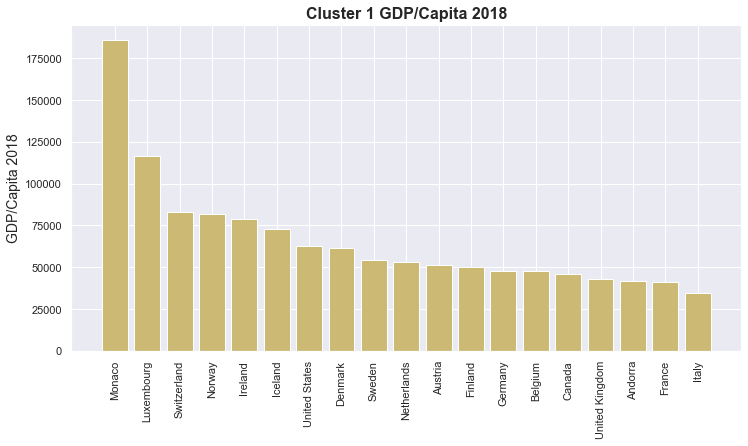

In [37]:
cluster_GDP_barchart (results_analysis, 1, 'y')

In [38]:
cluster_top_venues (results_venus, 1)

,Average Frequency in Cluster
Hotel,0.063274
Coffee Shop,0.044354
Café,0.040745
Restaurant,0.035933
Plaza,0.031196
Bar,0.029617
Park,0.020813
Cocktail Bar,0.019617
Historic Site,0.019474
Theater,0.017368


#### 5.3.2. Cluster 2:

In [39]:
get_cluster_countries(results_analysis, 2)

,Cluster Label,Country,Capital City,GDP/Capita 2018
0,2,Puerto Rico,San Juan,31651
1,2,Spain,Madrid,30371
2,2,Cyprus,Nicosia,28159
3,2,Turks and Caicos Islands,Cockburn Town,27142
4,2,Slovenia,Ljubljana,26124
5,2,Portugal,Lisbon,23408
6,2,Estonia,Tallinn,23266
7,2,Czech Republic,Prague,23079
8,2,Greece,Athens,20324
9,2,Lithuania,Vilnius,19153


In [40]:
get_cluster_GDP_stats(results_analysis, 2)

,Cluster Label,GDP/Capita 2018
count,27.0,27.000000
mean,2.0,18243.740741
std,0.0,6489.512158
min,2.0,9273.000000
25%,2.0,13605.500000
50%,2.0,17130.000000
75%,2.0,23172.500000
max,2.0,31651.000000


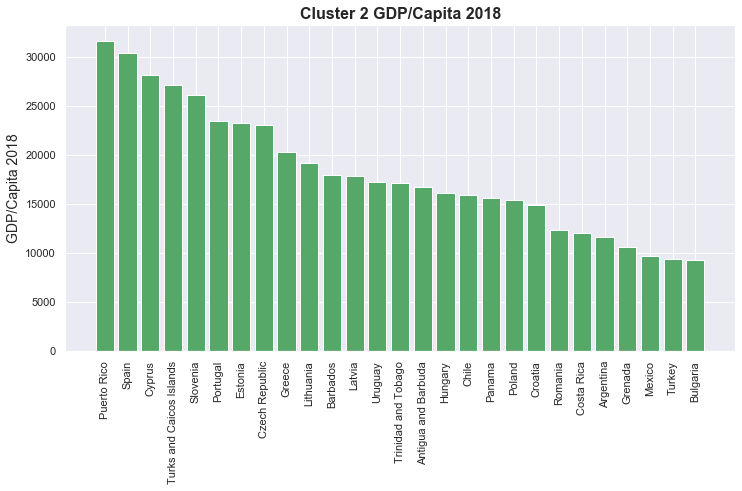

In [41]:
cluster_GDP_barchart (results_analysis, 2, 'g')

In [42]:
cluster_top_venues (results_venus, 2)

,Average Frequency in Cluster
Hotel,0.069425
Restaurant,0.046005
Café,0.043686
Coffee Shop,0.037674
Bar,0.029901
Italian Restaurant,0.028639
Bakery,0.020087
Park,0.019068
Pizza Place,0.018873
Eastern European Restaurant,0.017225


#### 5.3.3. Cluster 3:

In [43]:
get_cluster_countries(results_analysis, 3)

,Cluster Label,Country,Capital City,GDP/Capita 2018
0,3,Brazil,Brasília,8921
1,3,Montenegro,Podgorica,8844
2,3,Cuba,Havana,8822
3,3,Dominican Republic,Santo Domingo,8051
4,3,Dominica,Roseau,7691
5,3,Serbia,Belgrade,7247
6,3,Peru,Lima,6941
7,3,Colombia,Bogotá,6668
8,3,Ecuador,Quito,6345
9,3,Belarus,Minsk,6290


In [44]:
get_cluster_GDP_stats(results_analysis, 3)

,Cluster Label,GDP/Capita 2018
count,25.0,25.000000
mean,3.0,5633.560000
std,0.0,2151.356202
min,3.0,868.000000
25%,3.0,4549.000000
50%,3.0,6066.000000
75%,3.0,6941.000000
max,3.0,8921.000000


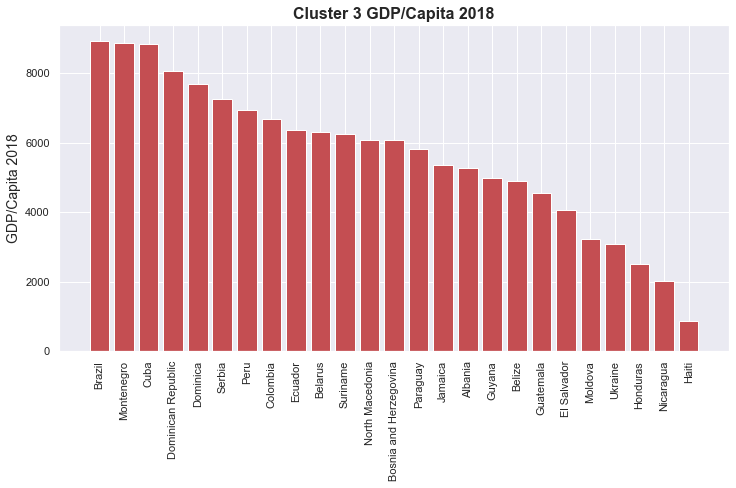

In [45]:
cluster_GDP_barchart (results_analysis, 3, 'r')

In [46]:
cluster_top_venues (results_venus, 3)

,Average Frequency in Cluster
Hotel,0.058114
Restaurant,0.041714
Coffee Shop,0.041600
Café,0.041486
Bar,0.039657
Plaza,0.022286
Park,0.022114
Bakery,0.020000
Caribbean Restaurant,0.017943
Theater,0.016400


### 5. Summary:

Overall, in this notebook we:
1. We did some final data pre-processing.  
2. We found the optimal K value for our K-Means model.
3. We have visualized the rsults on a map and used that visualization to apply some fixes to our data.  
4. Finally, our results were analyzed using different function and then presented in different ways that will help us interpret it later.

__Thank you for taking your time to read through this!__

### 6. References:

Foursquare. (n.d.). *Foursquare Developer*. Retrieved December 28, 2019, from Foursquare:
https://developer.foursquare.com/

Wikipedia contributors. (2019, December). *List of national capitals*. Retrieved March 04, 2020, from Wikipedia: https://en.wikipedia.org/w/index.php?title=List_of_national_capitals&oldid=943802946

World Bank, World Development Indicators. (n.d.-b). *GDP per capita (current US$) [Data File]*. Retrieved December 28, 2019, from The World Bank: https://databank.worldbank.org/source/world-development-indicators